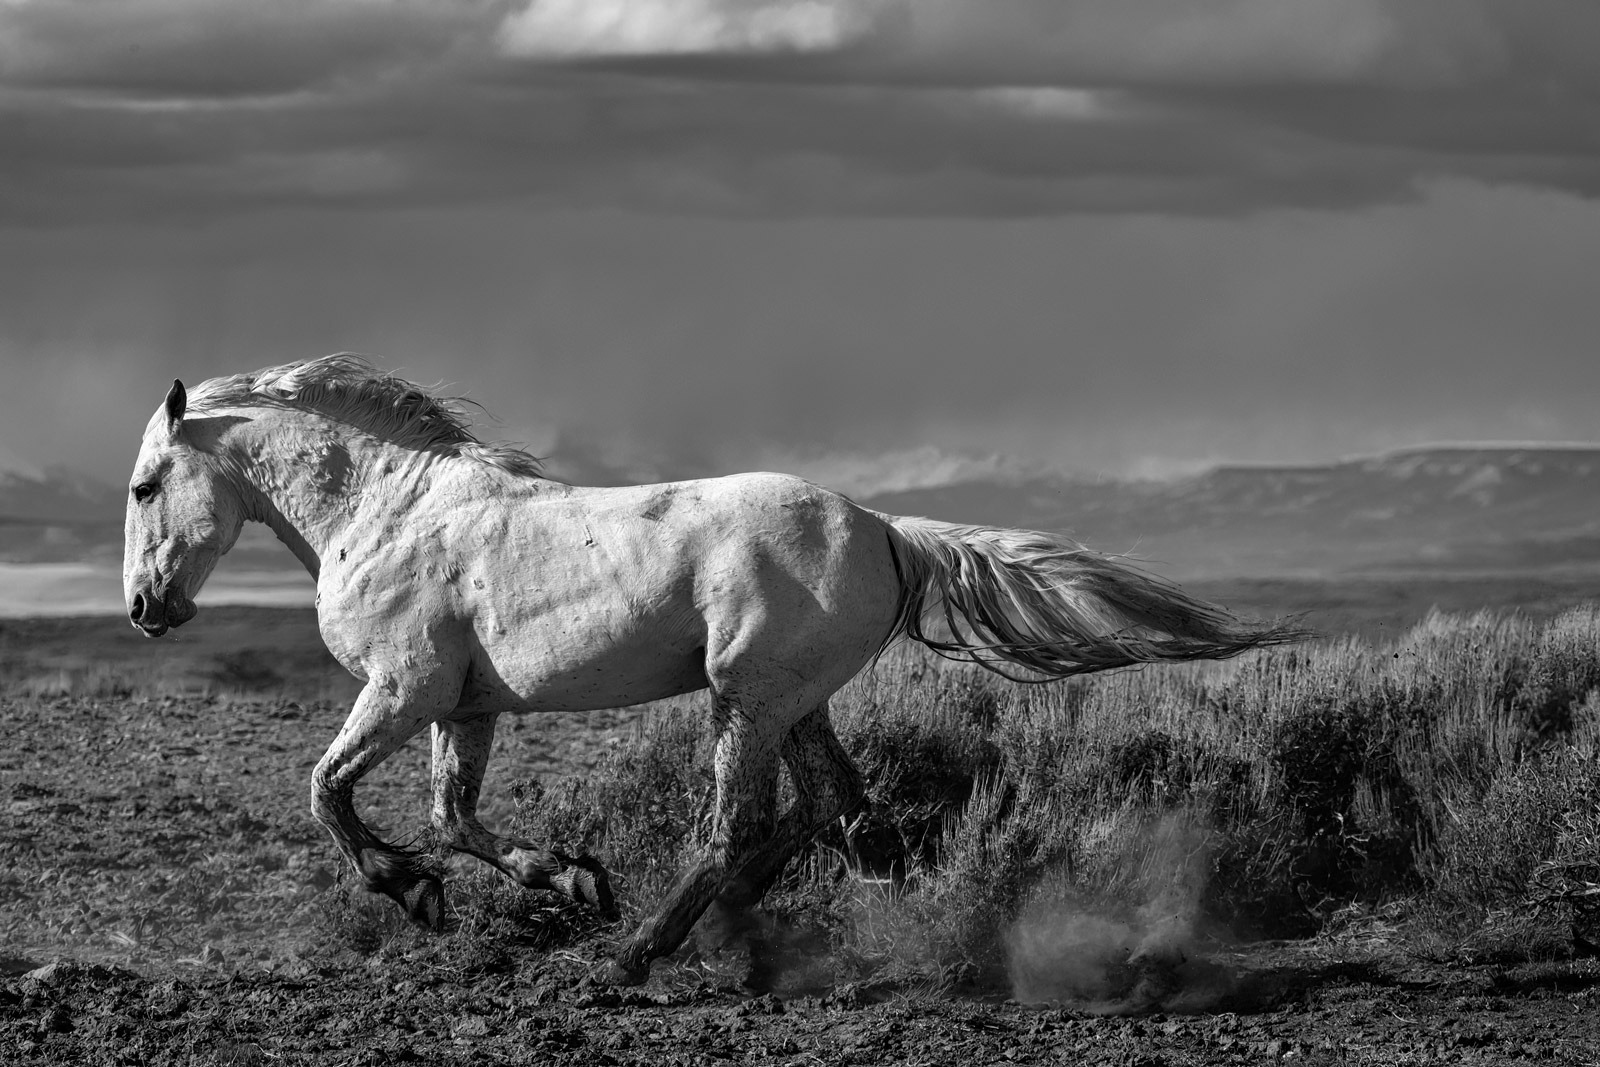

In [215]:
from PIL import Image

img = Image.open('./images/horse.jpg').convert("L")
img

In [216]:
from torchvision import transforms

to_tensor = transforms.ToTensor()
img = to_tensor(img)
img

tensor([[[0.6549, 0.6471, 0.6471,  ..., 0.3686, 0.3686, 0.3725],
         [0.6392, 0.6353, 0.6392,  ..., 0.3686, 0.3686, 0.3686],
         [0.6196, 0.6235, 0.6275,  ..., 0.3686, 0.3647, 0.3647],
         ...,
         [0.3569, 0.3725, 0.2039,  ..., 0.6824, 0.5843, 0.4627],
         [0.1490, 0.2039, 0.1333,  ..., 0.6275, 0.5373, 0.5098],
         [0.0039, 0.0706, 0.1490,  ..., 0.5804, 0.4000, 0.2980]]])

In [217]:
import torch, torch.nn.functional as F

kernel = torch.full((15, 15), 0.).fill_diagonal_(1)
kernel = torch.fliplr(kernel).unsqueeze(0).unsqueeze(0)

img = F.conv2d(img.unsqueeze(dim=0), kernel)
img /= torch.max(img)
img, img.shape

(tensor([[[[0.6155, 0.6155, 0.6150,  ..., 0.3778, 0.3768, 0.3773],
           [0.6073, 0.6057, 0.6044,  ..., 0.3770, 0.3773, 0.3776],
           [0.5978, 0.5959, 0.5941,  ..., 0.3776, 0.3778, 0.3773],
           ...,
           [0.2003, 0.2099, 0.1738,  ..., 0.2197, 0.2550, 0.2178],
           [0.2165, 0.1735, 0.1788,  ..., 0.2542, 0.2186, 0.1950],
           [0.1595, 0.1658, 0.1839,  ..., 0.2099, 0.1863, 0.2417]]]]),
 torch.Size([1, 1, 1053, 1586]))

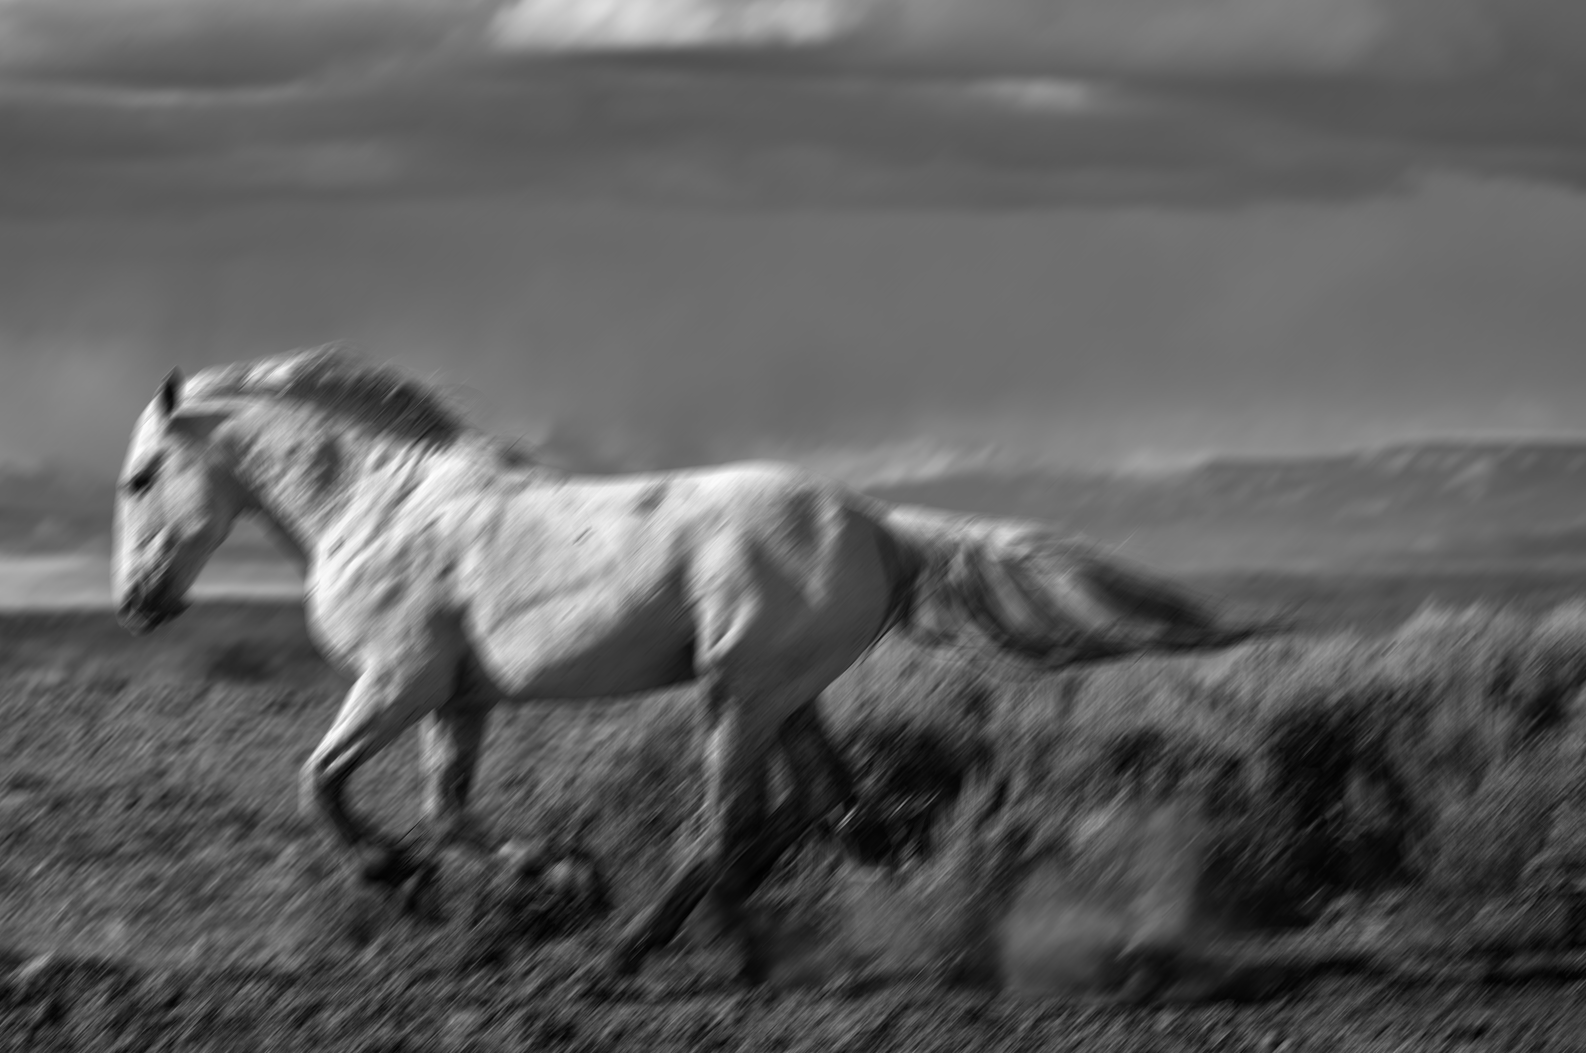

In [218]:
to_pil = transforms.ToPILImage()

pil_img = to_pil(img[0])
pil_img